In [1]:
import pandas as pd
import numpy as np
import cPickle as pickle
from datetime import date, datetime, timedelta
import seaborn as sns

def load_pickle(filepath):
    with open(filepath, 'r') as f:
        name = pickle.load(f)
    return name

def picklify(obj, name):
    with open(name, 'w') as f:
        pickle.dump(obj, f)
    print('pickled')
    return

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('ggplot')

In [4]:
df = load_pickle('../data/model_data.pkl')

In [5]:
df.head(1).T

,0
ActualElapsedTime,153
AirTime,137
ArrDelay,-12
ArrTime,1033
CRSArrTime,1045
CRSDepTime,700
CRSElapsedTime,165
CancellationCode,NaN
Cancelled,0
CarrierDelay,NaN


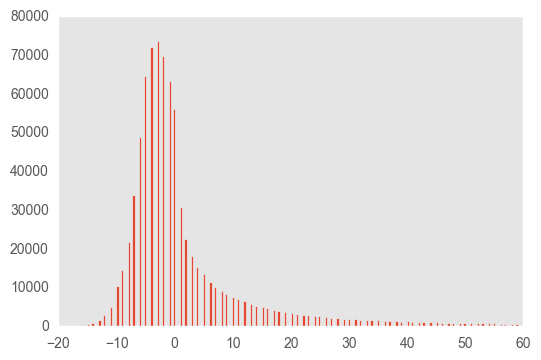

In [66]:
ax = df.ix[(df['DepDelay'] < 60) & (df['DepDelay'] > -20), 'DepDelay'].hist(bins=200)
ax.grid(False)
plt.savefig('all_delays.png')

In [69]:
df['DepDelay'].describe()

count    819757.000000
mean          5.416242
std          28.637154
min         -54.000000
25%          -4.000000
50%          -2.000000
75%           4.000000
max        1964.000000
Name: DepDelay, dtype: float64

In [68]:
df = df.dropna(axis=0, subset=['Airport'])

In [70]:
cols_to_int = ['wint_hol_1day', 'wint_hol_2day', 'fri_bef_mon_holiday']

In [71]:
for c in cols_to_int:
    df[c] = df[c].astype(int)

In [72]:
df['right'] = (df.DepDelay >= -3)

In [73]:
df['right'].value_counts()

True     542834
False    276923
Name: right, dtype: int64

In [74]:
# Test logistic regression predictor of left / right
y = df.ix[:, ['right']]

In [75]:
X = df.ix[:, ['AirTime', 'DayOfWeek', 'DayofMonth', 'Month', 'Year', 'CRSDepTime',
              'lat', 'long', 'DepDelayr', 'AvgArrDelay',
              'wint_hol_1day', 'wint_hol_2day', 'fri_bef_mon_holiday']]

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

In [77]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, roc_curve, auc

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
lm = LogisticRegression(verbose=1)

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm.classes_

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
accuracy_score(predictions, y_test)

In [44]:
def plot_roc(modelname):
    predicted_probs = modelname.predict_proba(X_test)
    fpr, tpr, thresh = roc_curve(y_test, predicted_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4,4))
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.legend(loc="lower right")
    plt.show()
    return

In [ ]:
plot_roc(lm)

In [ ]:
recall_score(predictions, y_test)

In [ ]:
precision_score(predictions, y_test)

In [ ]:
fpr, tpr, thresh = roc_curve(y_test, predicted_probs[:, 1])
roc_auc = auc(fpr, tpr)

In [ ]:
plt.figure(figsize=(4,4))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Try gradient boosted

In [38]:
from sklearn import ensemble
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split

In [39]:
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 130, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.3, 'min_samples_leaf': 1, 'random_state': 3, 'verbose': 1}
clf = ensemble.GradientBoostingClassifier(**params)

clf.fit(X_train, y_train)
acc = clf.score(X_test, y_test)
print("Accuracy: {:.4f}".format(acc))

/Users/cf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.2551           0.0240            1.53m
         2           1.2410           0.0131            1.47m
         3           1.2328           0.0081            1.42m
         4           1.2261           0.0044            1.40m
         5           1.2242           0.0040            1.39m
         6           1.2206           0.0025            1.39m
         7           1.2201           0.0027            1.38m
         8           1.2184           0.0014            1.36m
         9           1.2158           0.0015            1.34m
        10           1.2121           0.0033            1.33m
        20           1.2006           0.0004            1.19m
        30           1.1947           0.0003            1.07m
        40           1.1918           0.0004           57.76s
        50           1.1888           0.0001           51.17s
        60           1.1854           0.0004           44.71s
       

In [40]:
predicted_prob = clf.predict_proba(X_test)
predicted_gbc = clf.predict(X_test)

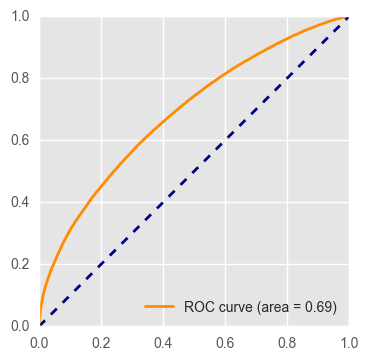

In [45]:
plot_roc(clf)

In [42]:
recall_score(predicted_gbc, y_test)

0.69472877437512559

In [43]:
precision_score(predicted_gbc, y_test)

0.92626882506993968

In [ ]:
clf

In [ ]:
for c, f in zip(X_train.columns, clf.feature_importances_):
    print(c, f)

In [ ]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [ ]:
print('Convenience plot with ``partial_dependence_plots``')

features = [(7,6)]
fig, axs = plot_partial_dependence(clf, X_train, features,
                                   feature_names=X.columns,
                                   n_jobs=3, grid_resolution=50, figsize=(8,2))

plt.tight_layout()
plt.subplots_adjust(top=1.9)  # tight_layout causes overlap with suptitle

In [ ]:
feature_importances = 100*clf.feature_importances_ / np.sum(clf.feature_importances_)
feature_importances, feature_names, feature_idxs = zip(*sorted(zip(feature_importances, X_train.columns, range(len(X_train.columns)))))

In [ ]:
from sklearn.ensemble.partial_dependence import partial_dependence

In [ ]:
# This kind of sucks
N_COLS = 3
fimportances = list(reversed(feature_importances))
fnames = list(reversed(feature_names))

pd_plots = [partial_dependence(clf, target_feature, X=X_train, grid_resolution=50)
            for target_feature in feature_idxs]
pd_plots = list(reversed(zip([pdp[0][0] for pdp in pd_plots], [pdp[1][0] for pdp in pd_plots])))

fig, axes = plt.subplots(nrows=4, ncols=N_COLS, sharey=True, 
                         figsize=(12.0, 8.0))

for i, (y_axis, x_axis) in enumerate(pd_plots[0:(4*N_COLS)]):
    ax = axes[i/N_COLS, i%N_COLS]
    ax.plot(x_axis, y_axis, color="purple")
    ax.set_xlim([np.min(x_axis), np.max(x_axis)])
    text_x_pos = np.min(x_axis) + 0.05*(np.max(x_axis) - np.min(x_axis))
    ax.text(text_x_pos, 8,
            "Feature Importance " + str(round(fimportances[i], )), 
            fontsize=12, alpha=0.5)
    ax.set_xlabel(fnames[i])
    
plt.suptitle("Partial Dependence Plots (Ordered by Feature Importance)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.savefig('plots/patial-dependence-plots.png', bbox_inches='tight')

In [317]:
picklify(clf, 'minus3_split_model.pkl')

pickled


In [23]:
X['model_predicted'] = clf.predict_proba(X)[:,1]

In [46]:
X_positive = X.ix[y['right'] == 1, :]

In [47]:
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['DayOfWeek'], prefix='dayoweek', drop_first=True)), axis=1)
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['Month'], prefix='mo', drop_first=True)), axis=1)
X_positive = pd.concat((X_positive, pd.get_dummies(X_positive['DayofMonth'], prefix='dayomo', drop_first=True)), axis=1)
X_positive = X_positive.drop(['DayOfWeek', 'Month', 'DayofMonth'], axis=1)

In [48]:
dummy_cols = ['DayOfWeek', 'Month', 'DayofMonth']

def dummify(dfm, cols):
    for c in cols:
        dfm = pd.concat((dfm, pd.get_dummies(dfm[c], prefix=c, drop_first=True)), axis=1)
    for c in cols: 
        dfm = dfm.drop([c], axis=1)
    return dfm

In [49]:
X_positive.head()

,AirTime,Year,CRSDepTime,lat,long,DepDelayr,AvgArrDelay,wint_hol_1day,wint_hol_2day,fri_bef_mon_holiday,...,dayomo_22,dayomo_23,dayomo_24,dayomo_25,dayomo_26,dayomo_27,dayomo_28,dayomo_29,dayomo_30,dayomo_31
0,137.0,2008,700.0,35.040222,-106.609194,7.659206,48.535000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135.0,2008,1545.0,35.040222,-106.609194,7.659206,48.535000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,219.0,2008,1205.0,36.124477,-86.678182,11.928683,53.656667,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,55.0,2008,615.0,43.564444,-116.222778,8.823368,51.810000,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,131.0,2008,1740.0,39.858408,-104.667002,9.249920,57.106667,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
y_positive = df.ix[df['right'] == 1, ['DepDelay']]

In [51]:
y_positive['DepDelay_adj'] = y_positive['DepDelay'] + 4

In [79]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [53]:
# formula = 'DepDelay ~ AirTime + DayOfWeek + DayofMonth + Month + Year + CRSDepTime + \
#               lat + long + wint_hol_1day + wint_hol_2day + fri_bef_mon_holiday + const'
# dta = X_positive
# dta['DepDelay'] = y_positive

In [54]:
y_positive_actual = y_positive['DepDelay_adj']
y_positive_actual.describe()

count    542834.000000
mean         15.283641
std          33.678512
min           1.000000
25%           2.000000
50%           5.000000
75%          14.000000
max        1968.000000
Name: DepDelay_adj, dtype: float64

In [55]:
X_positive = sm.add_constant(X_positive)

In [56]:
X_positive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542834 entries, 0 to 820415
Data columns (total 58 columns):
const                  542834 non-null float64
AirTime                542834 non-null float64
Year                   542834 non-null int64
CRSDepTime             542834 non-null float64
lat                    542834 non-null float64
long                   542834 non-null float64
DepDelayr              542834 non-null float64
AvgArrDelay            542834 non-null float64
wint_hol_1day          542834 non-null int64
wint_hol_2day          542834 non-null int64
fri_bef_mon_holiday    542834 non-null int64
dayoweek_2             542834 non-null float64
dayoweek_3             542834 non-null float64
dayoweek_4             542834 non-null float64
dayoweek_5             542834 non-null float64
dayoweek_6             542834 non-null float64
dayoweek_7             542834 non-null float64
mo_2                   542834 non-null float64
mo_3                   542834 non-null float64
mo_4

In [57]:
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_positive, y_positive, test_size=0.33)

In [58]:
gamm_log = sm.GLM(y_train_p['DepDelay_adj'], X_train_p, family=sm.families.Gamma(sm.families.links.log))
gamm_log_results = gamm_log.fit()
print(gamm_log_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           DepDelay_adj   No. Observations:               363698
Model:                            GLM   Df Residuals:                   363640
Model Family:                   Gamma   Df Model:                           57
Link Function:                    log   Scale:                   4.88865259849
Method:                          IRLS   Log-Likelihood:            -1.4562e+06
Date:                Sun, 27 Nov 2016   Deviance:                   6.3882e+05
Time:                        19:55:08   Pearson chi2:                 1.78e+06
No. Iterations:                    10                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -50.9221      3.272    -15.564      0.000     -57.335     -44.509
AirTime                -0

In [60]:
nobs = gamm_log_results.nobs
yhat = gamm_log_results.predict(X_test_p)

In [59]:
gamm_log_results.save('gammlog_pos.pickle', remove_data=True)

/Users/cf/anaconda2/lib/python2.7/site-packages/statsmodels/tools/decorators.py:117: CacheWriteWarning: The attribute 'mu' cannot be overwritten
  warnings.warn(errmsg, CacheWriteWarning)


In [92]:
gamm_log_results = sm.regression.linear_model.RegressionResults.load('gammlog_pos.pickle')

In [63]:
yhat_tst = tst.predict(X_test_p)

In [64]:
yhat == yhat_tst

32305     True
713988    True
651879    True
195647    True
474368    True
256645    True
182088    True
283690    True
51072     True
775120    True
39819     True
286642    True
93679     True
140303    True
234943    True
668688    True
90888     True
437872    True
553830    True
605788    True
426117    True
443958    True
594828    True
74922     True
586234    True
651119    True
431978    True
137011    True
812104    True
215438    True
          ... 
675035    True
628615    True
702961    True
138249    True
586121    True
677618    True
721392    True
182258    True
462080    True
548118    True
651301    True
360939    True
797720    True
209392    True
224033    True
514303    True
643818    True
384237    True
398946    True
527806    True
475527    True
538913    True
317239    True
255444    True
228747    True
598104    True
433467    True
38429     True
251839    True
81140     True
dtype: bool

In [37]:
y_ind = y_positive_actual >= 18

from statsmodels.graphics.api import abline_plot

ValueError: x and y must be the same size

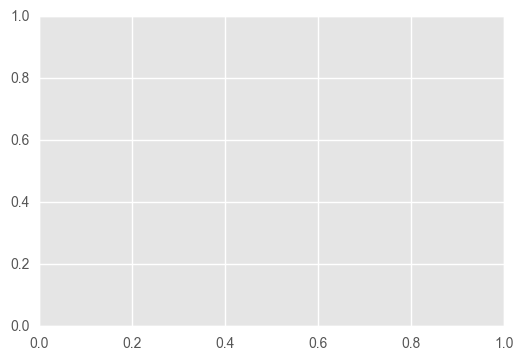

In [38]:
fig, ax = plt.subplots()
ax.scatter(yhat, y_positive_actual, c=y_ind)
line_fit = sm.OLS(y_positive_actual, sm.add_constant(yhat, prepend=True)).fit()
abline_plot(model_results=line_fit, ax=ax)

ax.set_title('Model Fit Plot')
ax.set_ylabel('Observed values')
ax.set_xlabel('Fitted values');

ValueError: x and y must be the same size

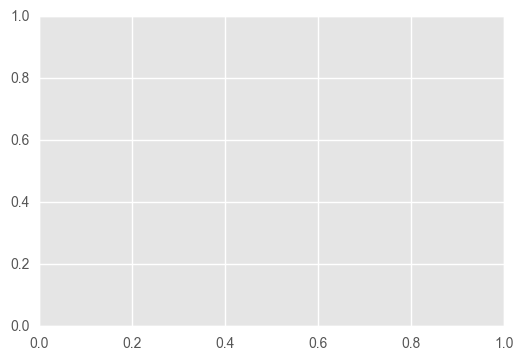

In [75]:
fig, ax = plt.subplots()

ax.scatter(yhat, gamm_log_results.resid_pearson, marker='o', facecolors='none', edgecolors='blue', alpha=0.5)
ax.set_title('Residual Dependence Plot')
ax.set_ylabel('Pearson Residuals')
ax.set_xlabel('Fitted values')

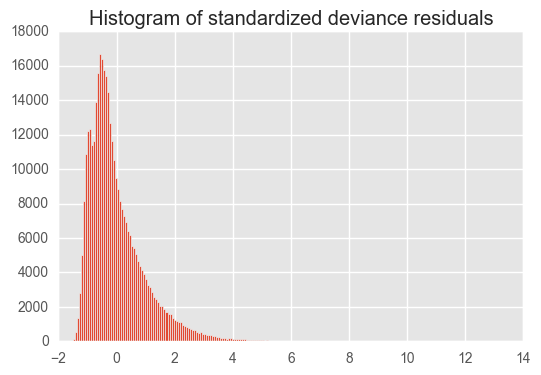

In [77]:
from scipy import stats

fig, ax = plt.subplots()

resid = gamm_log_results.resid_deviance.copy()
resid_std = stats.zscore(resid)
ax.hist(resid_std, bins=200)
ax.set_title('Histogram of standardized deviance residuals');

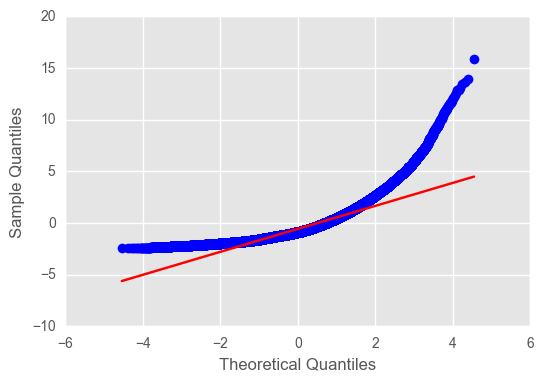

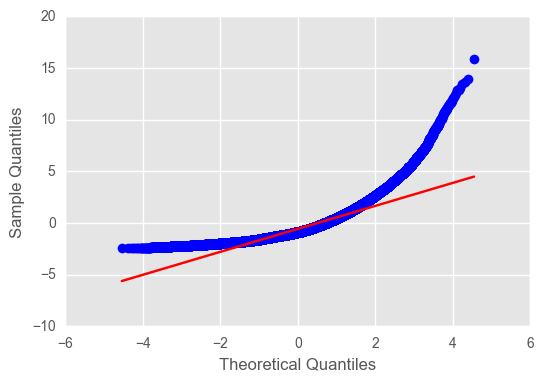

In [76]:
from statsmodels import graphics
graphics.gofplots.qqplot(resid, line='r')

In [78]:
yhat_s = pd.Series(yhat)

In [79]:
(yhat_s - 4).describe()

count    179136.000000
mean         11.296611
std           5.446089
min           0.912616
25%           7.343364
50%          10.129408
75%          14.012312
max          57.092753
dtype: float64

In [80]:
(y_test_p['DepDelay_adj'] - 4).describe()

count    179136.00000
mean         11.31681
std          33.91306
min          -3.00000
25%          -2.00000
50%           1.00000
75%          10.00000
max        1964.00000
Name: DepDelay_adj, dtype: float64

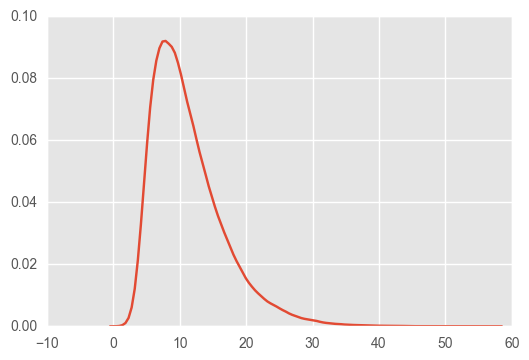

In [81]:
sns.kdeplot(yhat_s - 4)

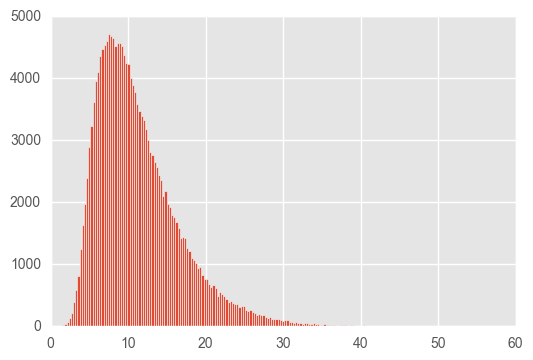

In [82]:
(yhat_s[yhat_s < 140] - 4).hist(bins=200)

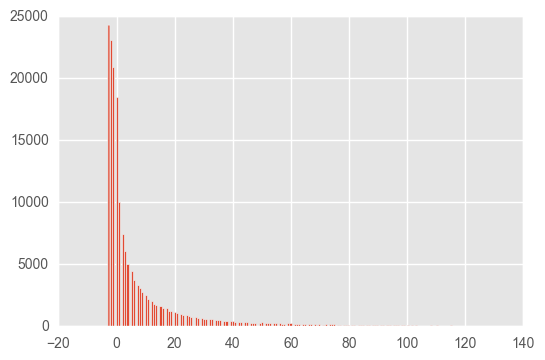

In [83]:
(y_test_p.ix[y_test_p['DepDelay'] < 140, 'DepDelay']).hist(bins=200)

In [80]:
X_negative = X.ix[y['right'] == 0, :]

In [81]:
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['DayOfWeek'], prefix='dayoweek', drop_first=True)), axis=1)
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['Month'], prefix='mo', drop_first=True)), axis=1)
X_negative = pd.concat((X_negative, pd.get_dummies(X_negative['DayofMonth'], prefix='dayomo', drop_first=True)), axis=1)
X_negative = X_negative.drop(['DayOfWeek', 'Month', 'DayofMonth'], axis=1)

In [82]:
X_negative = sm.add_constant(X_negative)
X_negative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276923 entries, 3 to 820418
Data columns (total 58 columns):
const                  276923 non-null float64
AirTime                276923 non-null float64
Year                   276923 non-null int64
CRSDepTime             276923 non-null float64
lat                    276923 non-null float64
long                   276923 non-null float64
DepDelayr              276923 non-null float64
AvgArrDelay            276923 non-null float64
wint_hol_1day          276923 non-null int64
wint_hol_2day          276923 non-null int64
fri_bef_mon_holiday    276923 non-null int64
dayoweek_2             276923 non-null float64
dayoweek_3             276923 non-null float64
dayoweek_4             276923 non-null float64
dayoweek_5             276923 non-null float64
dayoweek_6             276923 non-null float64
dayoweek_7             276923 non-null float64
mo_2                   276923 non-null float64
mo_3                   276923 non-null float64
mo_4

In [83]:
y_negative = df.ix[df['right'] == 0, ['DepDelay']]

In [84]:
y_negative.describe()

,DepDelay
count,276923.000000
mean,-6.085237
std,2.121663
min,-54.000000
25%,-7.000000
50%,-6.000000
75%,-4.000000
max,-4.000000


In [85]:
y_negative_adj = (-y_negative) - 3

In [86]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_negative, y_negative_adj, test_size=0.33)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1174f2e90>]], dtype=object)

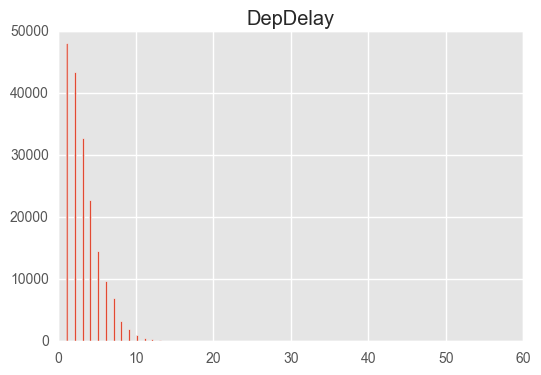

In [87]:
y_train_n.hist(bins=200)

In [88]:
y_train_n.describe()

,DepDelay
count,185538.000000
mean,3.085961
std,2.120679
min,1.000000
25%,1.000000
50%,3.000000
75%,4.000000
max,51.000000


In [89]:
gamm_log_neg = sm.GLM(y_train_n, X_train_n, family=sm.families.Gamma(sm.families.links.log))
gamm_log_results_neg = gamm_log_neg.fit()
print(gamm_log_results_neg.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               DepDelay   No. Observations:               185538
Model:                            GLM   Df Residuals:                   185480
Model Family:                   Gamma   Df Model:                           57
Link Function:                    log   Scale:                  0.458840896578
Method:                          IRLS   Log-Likelihood:            -3.6066e+05
Date:                Mon, 28 Nov 2016   Deviance:                       79920.
Time:                        11:10:27   Pearson chi2:                 8.51e+04
No. Iterations:                     6                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.0735      1.388    -27.421      0.000     -40.795     -35.352
AirTime              2.88

In [95]:
nobs_neg = gamm_log_results_neg.nobs
yhat_neg = gamm_log_results_neg.mu

In [91]:
gamm_log_results_neg.save('gammlog_neg.pickle', remove_data=True)

/Users/cf/anaconda2/lib/python2.7/site-packages/statsmodels/tools/decorators.py:117: CacheWriteWarning: The attribute 'mu' cannot be overwritten
  warnings.warn(errmsg, CacheWriteWarning)


In [93]:
gamm_log_results_neg = sm.regression.linear_model.RegressionResults.load('gammlog_neg.pickle')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134a27310>]], dtype=object)

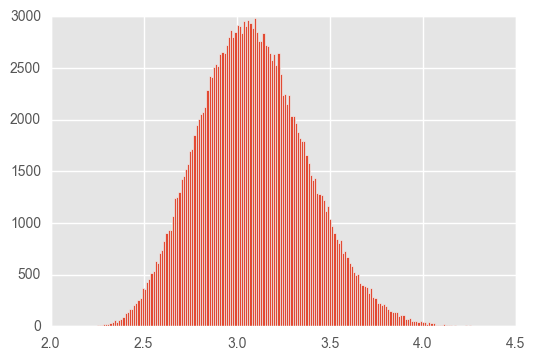

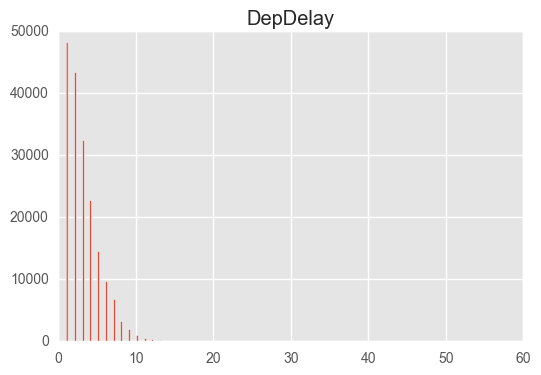

In [94]:
pd.Series(yhat_neg[yhat_neg < 40]).hist(bins=200)
y_train_n.hist(bins=200)

In [95]:
pd.Series(yhat_neg).describe()

count    185538.000000
mean          3.086727
std           0.291781
min           2.107268
25%           2.880397
50%           3.073310
75%           3.277494
max           4.423113
dtype: float64

In [123]:
(-y_train_n - 3).describe()

,DepDelay
count,185538.000000
mean,-6.086834
std,2.122328
min,-54.000000
25%,-7.000000
50%,-6.000000
75%,-4.000000
max,-4.000000


In [108]:
y = df.ix[:, ['right', 'DepDelay']]

In [109]:
# Test overall pipeline:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y, test_size=0.45)

In [100]:
# Stages - run classification task predictions
probs_clf = clf.predict_proba(X_test_f)
preds_clf = clf.predict(X_test_f)

In [101]:
probs_clf

array([[ 0.21747133,  0.78252867],
       [ 0.07844674,  0.92155326],
       [ 0.27399763,  0.72600237],
       ..., 
       [ 0.3424127 ,  0.6575873 ],
       [ 0.77565254,  0.22434746],
       [ 0.41863652,  0.58136348]])

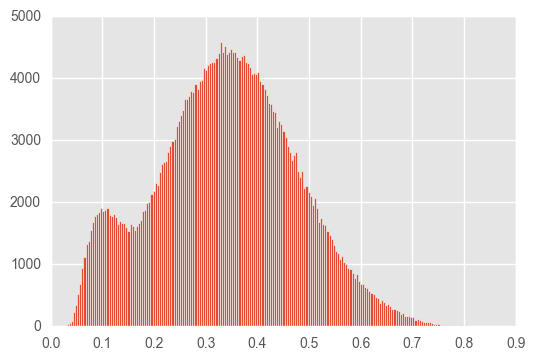

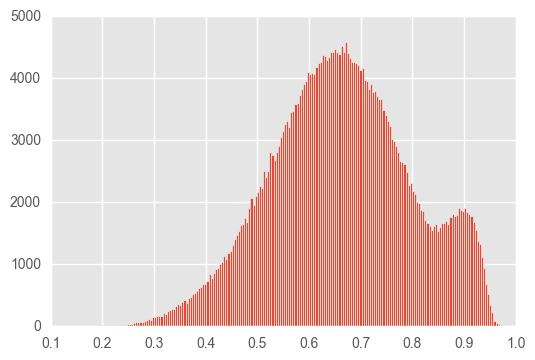

In [102]:
pd.Series(probs_clf[:, 0]).hist(bins=200)
plt.show()
pd.Series(probs_clf[:, 1]).hist(bins=200)
plt.show()

In [ ]:
clf.classes_

In [110]:
# Engineer features for further modeling
X_test_ns = dummify(X_test_f, dummy_cols)
X_test_ns = sm.add_constant(X_test_ns)

In [111]:
X_test_ns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368891 entries, 169206 to 816650
Data columns (total 58 columns):
const                  368891 non-null float64
AirTime                368891 non-null float64
Year                   368891 non-null int64
CRSDepTime             368891 non-null float64
lat                    368891 non-null float64
long                   368891 non-null float64
DepDelayr              368891 non-null float64
AvgArrDelay            368891 non-null float64
wint_hol_1day          368891 non-null int64
wint_hol_2day          368891 non-null int64
fri_bef_mon_holiday    368891 non-null int64
DayOfWeek_2            368891 non-null float64
DayOfWeek_3            368891 non-null float64
DayOfWeek_4            368891 non-null float64
DayOfWeek_5            368891 non-null float64
DayOfWeek_6            368891 non-null float64
DayOfWeek_7            368891 non-null float64
Month_2                368891 non-null float64
Month_3                368891 non-null float64

In [112]:
# Generate predictions from both models
yhat_pos = gamm_log_results.predict(X_test_ns)
yhat_neg = gamm_log_results_neg.predict(X_test_ns)

In [113]:
# un-transform outputs from both models
yhat_pos = yhat_pos - 4
yhat_neg = (-yhat_neg) - 3

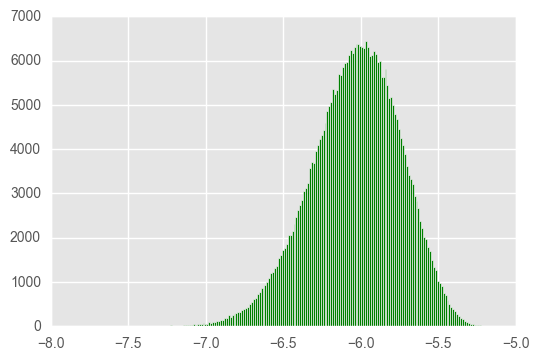

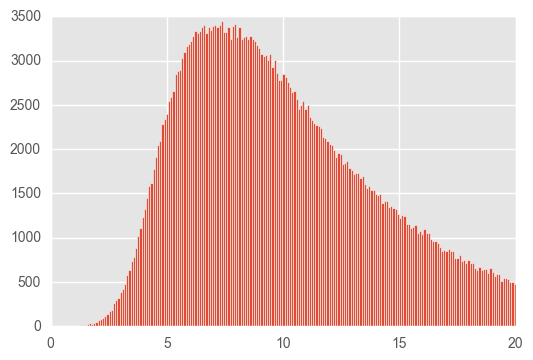

In [114]:
# Sanity checks
yhat_neg.hist(bins=200, color='green')
plt.show()
yhat_pos[yhat_pos < 20].hist(bins=200)
plt.show()

In [ ]:
yhat_pos_weighted = yhat_pos * probs_clf[:,1]
yhat_neg_weighted = yhat_neg * probs_clf[:,0]

In [ ]:
y_final = yhat_pos_weighted + yhat_neg_weighted

In [ ]:
y_final[y_final < 30].hist(bins=200)

In [ ]:
y_final.describe()

In [ ]:
y_test_f.ix[(y_test_f['DepDelay'] < 30) & (y_test_f['DepDelay'] > -20), 'DepDelay'].hist(bins=200)

In [ ]:
y_test_f['DepDelay'].describe()

In [ ]:
y_final.name = 'Predicted_delay'

In [ ]:
y_test_f.shape

In [ ]:
y_test_final = y_test_f.reset_index().ix[:, ['DepDelay']]
    

In [ ]:
results = pd.concat([y_test_final, y_final.reset_index()['Predicted_delay']], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
math.sqrt(mean_squared_error(results['DepDelay'], results['Predicted_delay']))

In [ ]:
results.sort_values('Predicted_delay', ascending=True).iloc[0:50,:]

In [ ]:
results_capped = results.ix[results['Predicted_delay'] < 20, :]

In [ ]:
plt.hist(results_capped.Predicted_delay, bins=200)
plt.show()
plt.scatter(results_capped.Predicted_delay, results_capped.DepDelay)


In [ ]:
X_test_ns.iloc[278920,:]

In [ ]:
xt = 3.00

In [ ]:
yt = [np.random.exponential(xt) for i in range(0,10000)]

In [ ]:
sns.distplot(np.array(yt), kde=False)

In [ ]:
X_test_ns.columns.values

In [103]:
from scipy.stats import expon

def prep_point(X_point):
    cols_for_df = ['const', 'AirTime', 'Year', 'CRSDepTime', 'lat', 'long',
       'DepDelayr', 'AvgArrDelay', 'wint_hol_1day', 'wint_hol_2day',
       'fri_bef_mon_holiday', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'DayofMonth_2', 'DayofMonth_3',
       'DayofMonth_4', 'DayofMonth_5', 'DayofMonth_6', 'DayofMonth_7',
       'DayofMonth_8', 'DayofMonth_9', 'DayofMonth_10', 'DayofMonth_11',
       'DayofMonth_12', 'DayofMonth_13', 'DayofMonth_14', 'DayofMonth_15',
       'DayofMonth_16', 'DayofMonth_17', 'DayofMonth_18', 'DayofMonth_19',
       'DayofMonth_20', 'DayofMonth_21', 'DayofMonth_22', 'DayofMonth_23',
       'DayofMonth_24', 'DayofMonth_25', 'DayofMonth_26', 'DayofMonth_27',
       'DayofMonth_28', 'DayofMonth_29', 'DayofMonth_30', 'DayofMonth_31']
    test_df = pd.DataFrame(columns=cols_for_df)
    X_point = pd.DataFrame(X_point).T
    for c in X_point.columns:
        test_df[c] = X_point[c]
    dummies = {'DayOfWeek_': int(X_point.DayOfWeek.values[0]), 
                  'Month_': int(X_point.Month.values[0]), 
                  'DayofMonth_': int(X_point.DayofMonth.values[0])}
    for k in dummies:
        if dummies[k] > 1:
            test_df.ix[X_point.index, [k+str(dummies[k])]] = 1
    test_df['const'] = [1]
    test_df = test_df.fillna(0)
    test_df = test_df.drop(['DayOfWeek', 'DayofMonth', 'Month'], axis=1)
    return test_df

def classifier_predict(raw_point):
    probs = clf.predict_proba(raw_point)
    return probs

def pos_neg_predict(X_t, left_bound, right_bound, prob_right):
    
    yhat_positive = gamm_log_results.predict(X_t)
    yhat_negative = gamm_log_results_neg.predict(X_t)

    binom_sample = np.random.binomial(1, prob_right, 10000) 
    left_sample = np.random.exponential(yhat_negative, 10000)
    right_sample = np.random.exponential(yhat_positive, 10000)
    left_sample = (-left_sample) - 3
    right_sample = right_sample - 4
    samples = (binom_sample * right_sample) + ((1 - binom_sample) * left_sample)
    return samples

In [104]:
def choose_point_by_index(p):
    tst_point = X_test_f.iloc[p,:]
    tst_y_point = y_test_f.iloc[p, :]
    return tst_point, tst_y_point

In [115]:
tst_x, tst_y = choose_point_by_index(4357)

In [116]:
tst_x

AirTime                 195.000000
DayOfWeek                 2.000000
DayofMonth                1.000000
Month                     6.000000
Year                   2010.000000
CRSDepTime             2055.000000
lat                      64.813677
long                   -147.859669
DepDelayr                 3.104938
AvgArrDelay              43.785000
wint_hol_1day             0.000000
wint_hol_2day             0.000000
fri_bef_mon_holiday       0.000000
Name: 168212, dtype: float64

In [117]:
tst_y

right       False
DepDelay       -4
Name: 168212, dtype: object

In [118]:
probabilities = classifier_predict(tst_x)
dist = pos_neg_predict(prep_point(tst_x), 0.1, 0.9, probabilities[0][1])

/Users/cf/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [119]:
probabilities

array([[ 0.46563194,  0.53436806]])

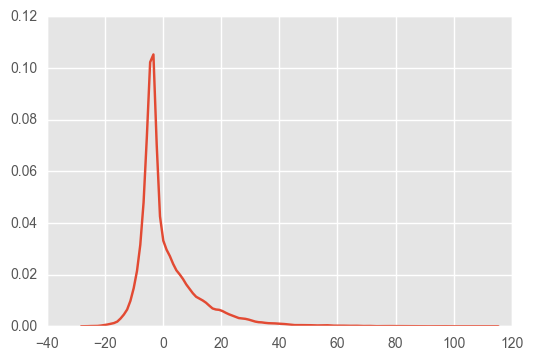

In [120]:
sns.kdeplot(pd.Series(dist))

In [121]:
print(pd.Series(dist).median())
print(tst_y)

-3.08055311177
right       False
DepDelay       -4
Name: 168212, dtype: object


In [122]:
np.percentile(dist, 90)

15.047963777703602

In [136]:
def test_model(test_df):
    for index, row in test_df.iterrows():
        print(row)

In [ ]:
actual_delays = results.ix[results['DepDelay'] >= 15, :]

In [ ]:
actual_delays['delay_predicted'] = actual_delays['Predicted_delay'] >= 15

In [ ]:
actual_delays['delay_predicted'].value_counts()

In [ ]:
plt.plot()

In [407]:
def input_point(year, month, day, deptime, dest, airline):
    pass

In [414]:
airline = "AS"
dest = "ANC"
df.ix[df['OrDestCarrier'] == 'SEA' + dest + airline, ['DepDelayr']].mean()

DepDelayr    3.347036
dtype: float64

In [420]:
df_routedelays = df.drop_duplicates(subset=['DepDelayr']).ix[:, ['OrDestCarrier', 'DepDelayr']]

In [421]:
df_routedelays

,OrDestCarrier,DepDelayr
0,SEAABQWN,7.659206
2,SEABNAWN,11.928683
3,SEABOIWN,8.823368
6,SEADENWN,9.249920
9,SEAGEGWN,8.501954
13,SEALASWN,10.025932
17,SEAMCIWN,10.248753
18,SEAMDWWN,7.996301
20,SEAOAKWN,11.806649
27,SEAPHXWN,10.762429


In [431]:
pd.unique(df['airport'])

array(['Albuquerque International', 'Nashville International',
       'Boise Air Terminal', 'Denver Intl', 'Spokane Intl',
       'McCarran International', 'Kansas City International',
       'Chicago Midway', 'Metropolitan Oakland International',
       'Phoenix Sky Harbor International', 'Reno/Tahoe International',
       'San Jose International', 'Salt Lake City Intl',
       'Sacramento International', 'Portland Intl',
       'Los Angeles International', 'San Francisco International',
       'Washington Dulles International', "Chicago O'Hare International",
       'Charlotte/Douglas International', 'Philadelphia Intl',
       'John F Kennedy Intl', 'William B Hartsfield-Atlanta Intl',
       'Cincinnati Northern Kentucky Intl', 'Honolulu International',
       'Kahului', 'Minneapolis-St Paul Intl',
       'Detroit Metropolitan-Wayne County', 'Memphis International',
       'Dallas-Fort Worth International', 'Lambert-St Louis International',
       'Gen Edw L Logan Intl', 'John Wayn

In [427]:
df.head(1).T

,0
ActualElapsedTime,153
AirTime,137
ArrDelay,-12
ArrTime,1033
CRSArrTime,1045
CRSDepTime,700
CRSElapsedTime,165
CancellationCode,NaN
Cancelled,0
CarrierDelay,NaN


In [135]:
# Create lookup dataframe
lookup = df.groupby('OrDestCarrier').max()[['iata', 'UniqueCarrier', 'DepDelayr', 'AvgArrDelay', 'lat', 'long', 'airport', 'AirTime']]

In [136]:
lookup = lookup.reset_index()

In [137]:
lookup.head()

,OrDestCarrier,iata,UniqueCarrier,DepDelayr,AvgArrDelay,lat,long,airport,AirTime
0,SEAABQAS,ABQ,AS,1.316971,48.535000,35.040222,-106.609194,Albuquerque International,175.0
1,SEAABQWN,ABQ,WN,7.659206,48.535000,35.040222,-106.609194,Albuquerque International,176.0
2,SEAANCAS,ANC,AS,3.347036,47.826667,61.174320,-149.996186,Ted Stevens Anchorage International,277.0
3,SEAANCB6,ANC,B6,12.838710,47.826667,61.174320,-149.996186,Ted Stevens Anchorage International,244.0
4,SEAANCCO,ANC,CO,11.276116,47.826667,61.174320,-149.996186,Ted Stevens Anchorage International,252.0


In [138]:
picklify(lookup, 'lookupdf.pkl')

pickled


In [149]:
df['airport'].unique()

array(['Albuquerque International', 'Nashville International',
       'Boise Air Terminal', 'Denver Intl', 'Spokane Intl',
       'McCarran International', 'Kansas City International',
       'Chicago Midway', 'Metropolitan Oakland International',
       'Phoenix Sky Harbor International', 'Reno/Tahoe International',
       'San Jose International', 'Salt Lake City Intl',
       'Sacramento International', 'Portland Intl',
       'Los Angeles International', 'San Francisco International',
       'Washington Dulles International', "Chicago O'Hare International",
       'Charlotte/Douglas International', 'Philadelphia Intl',
       'John F Kennedy Intl', 'William B Hartsfield-Atlanta Intl',
       'Cincinnati Northern Kentucky Intl', 'Honolulu International',
       'Kahului', 'Minneapolis-St Paul Intl',
       'Detroit Metropolitan-Wayne County', 'Memphis International',
       'Dallas-Fort Worth International', 'Lambert-St Louis International',
       'Gen Edw L Logan Intl', 'John Wayn

In [142]:
with open('airport_options.txt', 'w') as f:
    for a in lookup.airport.unique():
        f.write('<option>' + a + '</option>')
        f.write('\n')

In [146]:
df.ix[df['Year'] == 2016, ['UniqueCarrier']].UniqueCarrier.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'HA', 'OO', 'UA', 'VX', 'WN', 'NK'], dtype=object)

In [154]:
tstflights = df.ix[(df['UniqueCarrier'] == 'VX') & (df['Dest'] == 'SFO'), ['CRSDepTime', 'DepDelay']]

In [156]:
tstflights.ix[tstflights['DepDelay'] >= 15, :].count()

CRSDepTime    1492
DepDelay      1492
dtype: int64

In [165]:
lookup.sort_values(by='airport',)

,OrDestCarrier,iata,UniqueCarrier,DepDelayr,AvgArrDelay,lat,long,airport,AirTime
0,SEAABQAS,ABQ,AS,1.316971,48.535000,35.040222,-106.609194,Albuquerque International,175.0
1,SEAABQWN,ABQ,WN,7.659206,48.535000,35.040222,-106.609194,Albuquerque International,176.0
12,SEAAUSWN,AUS,WN,9.602041,54.806667,30.194533,-97.669872,Austin-Bergstrom International,239.0
11,SEAAUSAS,AUS,AS,2.870229,54.806667,30.194533,-97.669872,Austin-Bergstrom International,307.0
26,SEABWIWN,BWI,WN,12.505212,54.575000,39.175402,-76.668198,Baltimore-Washington International,349.0
25,SEABWIFL,BWI,FL,7.176913,54.575000,39.175402,-76.668198,Baltimore-Washington International,317.0
24,SEABWIAS,BWI,AS,0.024896,54.575000,39.175402,-76.668198,Baltimore-Washington International,331.0
15,SEABLIAS,BLI,AS,2.941176,46.788333,48.792750,-122.537528,Bellingham Intl,37.0
14,SEABILOO,BIL,OO,2.469697,51.233333,45.807662,-108.542861,Billings Logan Intl,98.0
19,SEABOIWN,BOI,WN,8.823368,51.810000,43.564444,-116.222778,Boise Air Terminal,85.0


In [158]:
1492 / 6547.0

0.2278906369329464

In [170]:
airports = lookup.sort_values(by='airport')[['airport', 'UniqueCarrier']]

In [183]:
airline_codes = {'AA': 'American',
                 'AS': 'Alaska',
                 'B6': 'JetBlue',
                 'CO': 'Continental',
                 'DL': 'Delta',
                 'F9': 'Frontier',
                 'FL': 'AirTran',
                 'HA': 'Hawaiian',
                 'NW': 'Northwest',
                 'OO': 'SkyWest',
                 'UA': 'United',
                 'US': 'US',
                 'VX': 'Virgin America',
                 'WN': 'Southwest',
                 'NK': 'Spirit'}

In [186]:
airline_names = [airline_codes[n] for n in airports.UniqueCarrier]

In [187]:
airports['CarrierName'] = airline_names

In [192]:
grouped = airports.groupby('airport')

df = grouped.aggregate(lambda x: list(x))

df = df.ix[:,['CarrierName']]

In [193]:
df

,CarrierName
airport,
Albuquerque International,"[Alaska, Southwest]"
Austin-Bergstrom International,"[Southwest, Alaska]"
Baltimore-Washington International,"[Southwest, AirTran, Alaska]"
Bellingham Intl,[Alaska]
Billings Logan Intl,[SkyWest]
Boise Air Terminal,"[Southwest, SkyWest]"
Bradley International,[JetBlue]
Burbank-Glendale-Pasadena,[Alaska]
Charleston AFB/International,[Alaska]


In [196]:
(df.to_json(orient="index", force_ascii=False)).replace('\\', '')

'{"Albuquerque International":{"CarrierName":["Alaska","Southwest"]},"Austin-Bergstrom International":{"CarrierName":["Southwest","Alaska"]},"Baltimore-Washington International":{"CarrierName":["Southwest","AirTran","Alaska"]},"Bellingham Intl":{"CarrierName":["Alaska"]},"Billings Logan Intl":{"CarrierName":["SkyWest"]},"Boise Air Terminal":{"CarrierName":["Southwest","SkyWest"]},"Bradley International":{"CarrierName":["JetBlue"]},"Burbank-Glendale-Pasadena":{"CarrierName":["Alaska"]},"Charleston AFB/International":{"CarrierName":["Alaska"]},"Charlotte/Douglas International":{"CarrierName":["American","US"]},"Chicago Midway":{"CarrierName":["Southwest"]},"Chicago O\'Hare International":{"CarrierName":["United","Frontier","Alaska","Continental","American"]},"Cincinnati Northern Kentucky Intl":{"CarrierName":["Delta"]},"City of Colorado Springs Muni":{"CarrierName":["SkyWest","Frontier"]},"Cleveland-Hopkins Intl":{"CarrierName":["United","Frontier","Continental"]},"Dallas Love ":{"Carrie